# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 3</span>


In [3]:
import scipy
from scipy.special import erf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Esercizio 3.01

L'obiettivo dell'esercizio è calcolare il prezzo di una *Vanilla call-option* e *put-option* per un asset fittizio dati alcuni parametri iniziali:
- prezzo dell'asset a $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$

- tasso d'interesse (risk-free): $r=0.1$
- volatilità: $\sigma=0.25$

Il prezzo finale deve essere calcolato prima tramite un campionamento diretto del prezzo finale dell'asset $S(T)$ e poi tramite una simulazione dell'evoluzione del prezzo $S(t)$ come un *moto browniano geometrico*.

La stima dei prezzi delle opzioni è stata ottenuta simulando $10^5$ prezzi dell'asset, suddivisi in $100$ Blocchi per il calcolo dell'incertezza.
I risultati sono mostrati tramite grafici del prezzo in fuzione del numero di blocchi.

In [3]:
# Analitic solution of the problem provided by Black and Scholes

# Parameters
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Simulazione diretta del prezzo finale S(T)

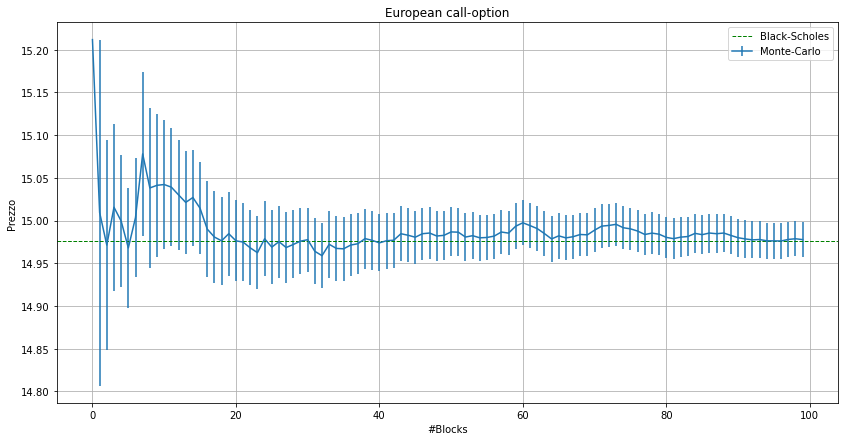

In [5]:
N = 100 # Numero di blocchi
prog_average_call_profit = np.loadtxt("../results/EX03_1(1).dat", usecols=0)
prog_error_call_profit = np.loadtxt("../results/EX03_1(1).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_call_profit, yerr=prog_error_call_profit, label='Monte-Carlo')
plt.axhline(y=14.976, label='Black-Scholes', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European call-option')
plt.xlabel('#Blocks')
plt.ylabel('Prezzo')
plt.grid(True)

plt.show()

In [2]:
N = 100 # Number of blocks
prog_average_put_profit = np.loadtxt("../results/EX03_1(2).dat", usecols=0)
prog_error_put_profit = np.loadtxt("../results/EX03_1(2).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_put_profit, yerr=prog_error_put_profit, label='Monte-Carlo')
plt.axhline(y=5.460, label='Black-Scholes', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European put-option')
plt.xlabel('#Blocks')
plt.ylabel('Prezzo')
plt.grid(True)

plt.show()

NameError: name 'np' is not defined

#### (2) Simulazione del moto browniano geometrico $GBM(r,\sigma^2)$ del prezzo dell'asset

Per il metodo di campionamento discreto ho diviso l'intervallo $[0,T]$ in $100$ intervalli temporali: $S(0)$, $S(t_1)$, $S(t_2)$, ..., $S(t_{100}=T=1)$. Per calcolare il prezzo dell'opzione ho quindi considerato solo il prezzo $S$ al momento della scadenza.

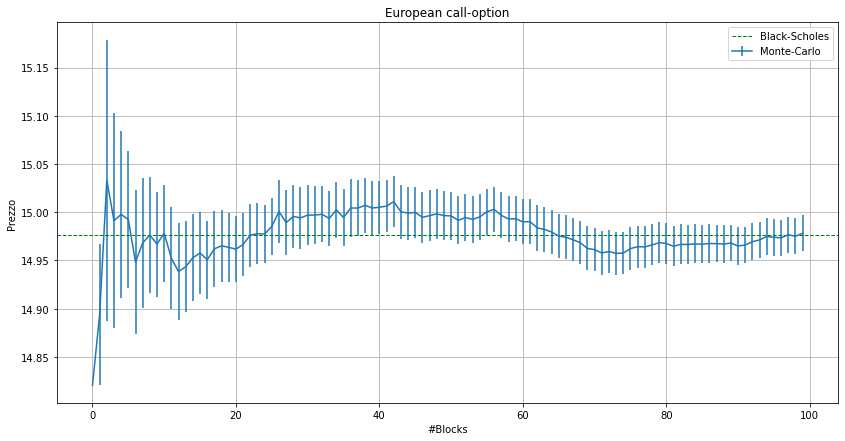

In [5]:
N = 100 # Number of blocks
prog_average_call_profit = np.loadtxt("../results/EX03_1(3).dat", usecols=0)
prog_error_call_profit = np.loadtxt("../results/EX03_1(3).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_call_profit, yerr=prog_error_call_profit, label='Monte-Carlo')
plt.axhline(y=14.976, label='Black-Scholes', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European call-option')
plt.xlabel('#Blocks')
plt.ylabel('Prezzo')
plt.grid(True)

plt.show()

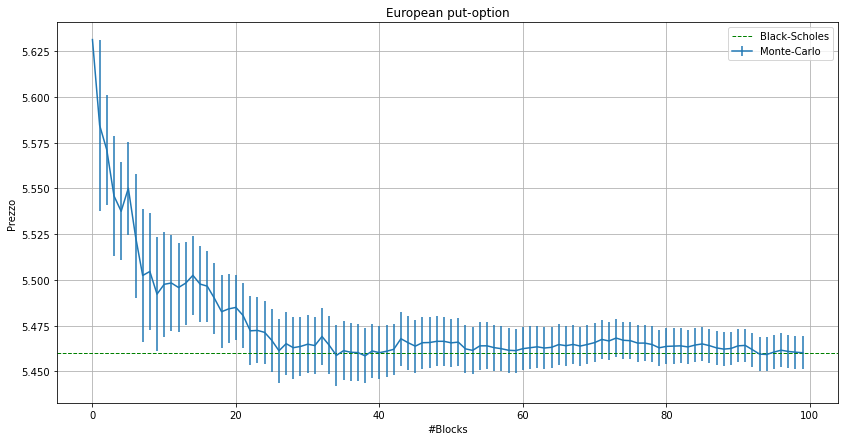

In [12]:
N = 100 # Number of blocks
prog_average_put_profit = np.loadtxt("../results/EX03_1(4).dat", usecols=0)
prog_error_put_profit = np.loadtxt("../results/EX03_1(4).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_put_profit, yerr=prog_error_put_profit, label='Monte-Carlo')
plt.axhline(y=5.460, label='Black-Scholes', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European put-option')
plt.xlabel('#Blocks')
plt.ylabel('Prezzo')
plt.grid(True)

plt.show()

In tutti i casi vediamo come il prezzo stimato dalla simulazione tenda al valore teorico.